In [1]:
#import of subprograms

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from __plt__2 import *

In [2]:
#inputting database
path = r'E:\databases\GAMAs4\DETG_DR4.csv'
usecols = ['ager_percentile50', 'T_C_ISM_percentile50', 'T_C_ISM_percentile84', 'T_C_ISM_percentile16', 'T_W_BC_percentile50', 'T_W_BC_percentile84', 'T_W_BC_percentile16', 'P100_flux', 'P100_fluxerr', 'BPT', 'WHAN', 'Z', 'SFR_0_1Gyr_percentile50', 'SFR_0_1Gyr_percentile84', 'SFR_0_1Gyr_percentile16', 'mass_stellar_percentile50', 'SurfaceDensity', 'SurfaceDensityErr', 'SurfaceDensityFlag', 'LOIII', 'LOIII_er', 'SURVEY']
MainDataFrame = pd.read_csv(path, usecols=usecols)

In [3]:
#bids setting
bids_age = [[0.0, 8.8], [8.8, 9.0], [9.0, 9.2], [9.2, 9.4], [9.4, 9.6], [9.6, 9.8], [9.8, 10.0]]
bids_age_plt = [[8.8, 9.0], [9.0, 9.2], [9.2, 9.4], [9.4, 9.6], [9.6, 9.8], [9.8, 10.0]]
bids_mass = [[0.0, 10.0], [10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]
bids_mass_plt = [[10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]
bids_z = [[0.0, 0.05], [0.05, 0.1], [0.1, 0.15], [0.15, 0.2], [0.2, 0.25], [0.25, 0.3], [0.3, 0.34]]

In [4]:
# MainDataFrame.replace('""', -999.0, inplace=True)
# MainDataFrame['SurfaceDensity'] = pd.to_numeric(MainDataFrame['SurfaceDensity'])
# MainDataFrame['SurfaceDensityErr'] = pd.to_numeric(MainDataFrame['SurfaceDensityErr'])
# MainDataFrame['SurfaceDensityFlag'] = pd.to_numeric(MainDataFrame['SurfaceDensityFlag'])
# MainDataFrame.to_csv('main.csv')

# db = MainDataFrame

# db = db[db['SurfaceDensity'] > 0]
# db = db[db['SurfaceDensityErr'] > 0]
# db = db[db['SurfaceDensity'] > 2*db['SurfaceDensityErr']]
# db['SurfaceDensity'] = np.log10(db['SurfaceDensity'])
# UP = np.log10(db['SurfaceDensity'] + db['SurfaceDensityErr'])
# print(UP)
# db['SurfaceDensityUp'] = UP
# DOWN = np.log10(db['SurfaceDensity'] - db['SurfaceDensityErr'])
# db['SurfaceDensityDown'] = DOWN

# print(db['SurfaceDensity'])
# print(db['SurfaceDensityUp'])
# print(db['SurfaceDensityDown'])

            Z SURVEY  WHAN    BPT  mass_stellar_percentile50  \
0    0.054964   SDSS   LLR   AGNX                     10.410   
1    0.055218   SDSS   LLR   AGNX                     10.820   
2    0.093235   SDSS  sAGN  UNCXY                     10.880   
3    0.088265   SDSS   ELR   UNCX                     10.470   
4    0.085405   SDSS  wAGN  AGNXY                     10.660   
..        ...    ...   ...    ...                        ...   
728  0.124753   GAMA   SFG  UNCXY                      9.357   
729  0.132078   GAMA  sAGN  UNCXY                     10.710   
730  0.280003   GAMA   NER   UNCX                     10.890   
731  0.137907   GAMA  sAGN  UNCXY                     10.260   
732  0.180863   GAMA   LLR   NOEL                     10.220   

     T_C_ISM_percentile16  T_C_ISM_percentile50  T_C_ISM_percentile84  \
0                  17.888                21.063                23.588   
1                  21.988                23.388                24.513   
2           

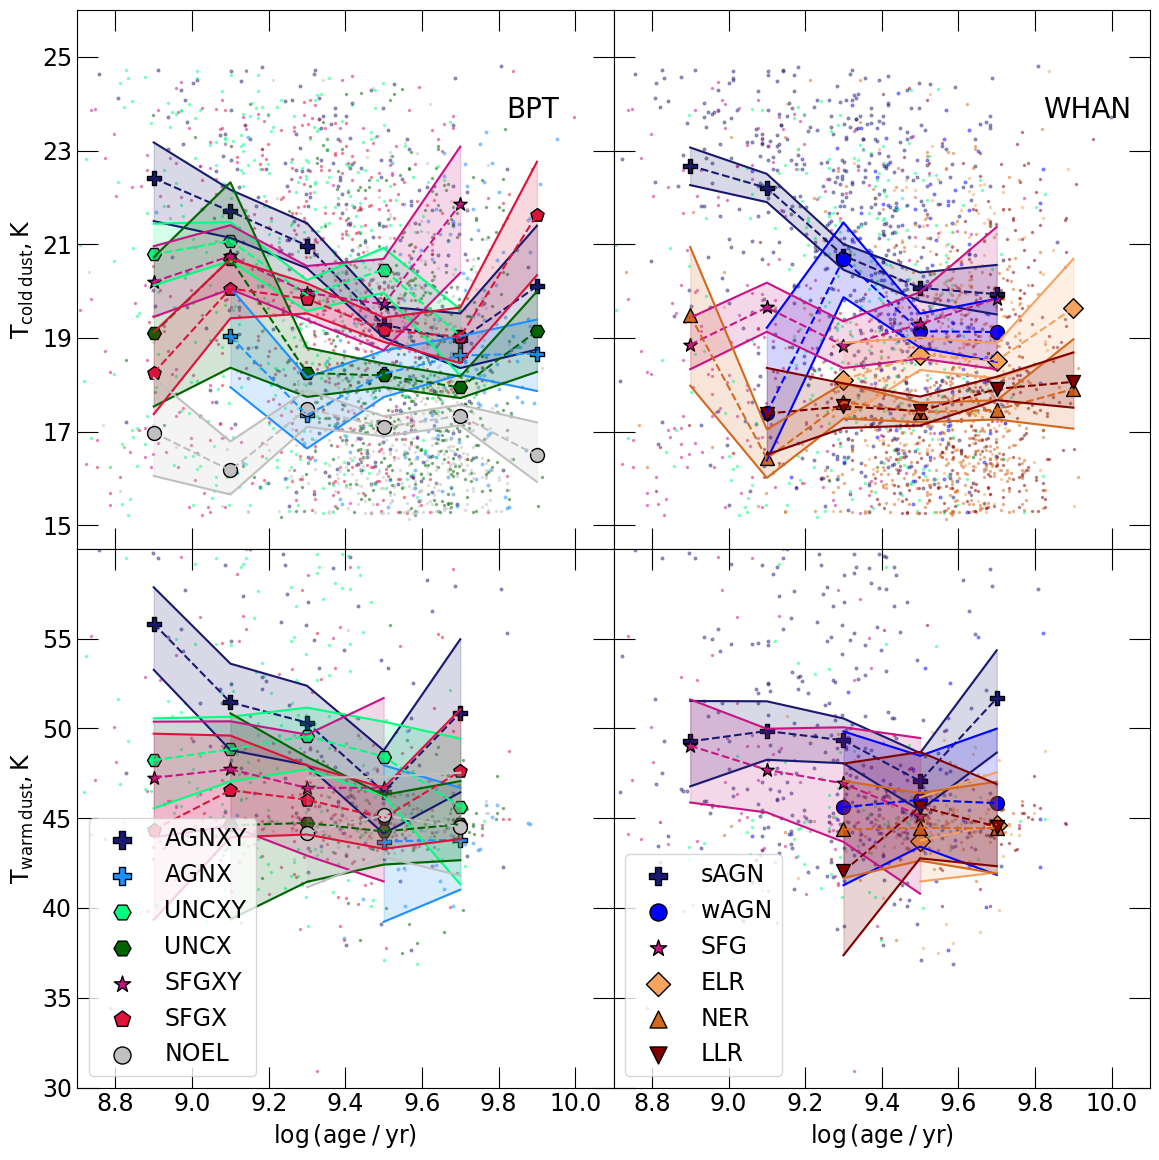

In [5]:
db = MainDataFrame

#setting up figure and its shape
gs_top = plt.GridSpec(2, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 12), tight_layout=True)
adjusting_plotting_pars()

ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1], sharey=ax1)
ax3 = fig.add_subplot(gs_top[1,0])
ax4 = fig.add_subplot(gs_top[1,1], sharey=ax3)

#creating basic plotting pars
pars_dict_1 ={
    'db' : db,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'ager_percentile50',
    'y' : 'T_C_ISM_percentile50',
    'up' : 'T_C_ISM_percentile84',
    'down' : 'T_C_ISM_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [14.5, 26],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(15, 25.9, 2),
    'xlabel' : False,
    'ylabel' : r'$\mathrm{T_{cold \: dust}, K}$',
    'bids': bids_age_plt,
    'annotation' : True,
    'legend' : False
}

db2 = db[db['P100_flux'] > 2*db['P100_fluxerr']]
db2 = db2[db2['P100_flux'] > 0]
db2.reset_index(inplace=True, drop=True)
print(db2)
print(db2.shape)

pars_dict_2 = {
    'db' : db2,
    'ax1' : ax3,
    'ax2' : ax4,
    'x' : 'ager_percentile50',
    'y' : 'T_W_BC_percentile50',
    'up' : 'T_W_BC_percentile84',
    'down' : 'T_W_BC_percentile16',
    'xlim' : [8.7, 10.1],
    'ylim' : [30, 60],
    'xticks' : np.arange(8.8, 10.1, 0.2),
    'yticks' : np.arange(30, 60, 5),
    'xlabel' : r'$\log \mathrm{(age \: / \: yr)}$',
    'ylabel' : r'$\mathrm{T_{warm \: dust}, K}$',
    'bids': bids_age_plt,
    'annotation' : False,
    'legend' : True
}

#initialzing of plotting
ax1, ax2 = plotting(pars_dict_1)
ax3, ax4 = plotting(pars_dict_2)

#additional plotting stuff
fig.savefig(r'E:\backup\backup_BPT\FIGURES_IN_PAPER_DR4\TDC.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)
#displaying and saving the figure 

In [6]:
db = MainDataFrame

print(db.shape)
db2 = db[db['ager_percentile50'] < 8.7]
print(db2.shape)


(2409, 22)
(42, 22)


(397, 22)
(998, 22)
(1014, 22)


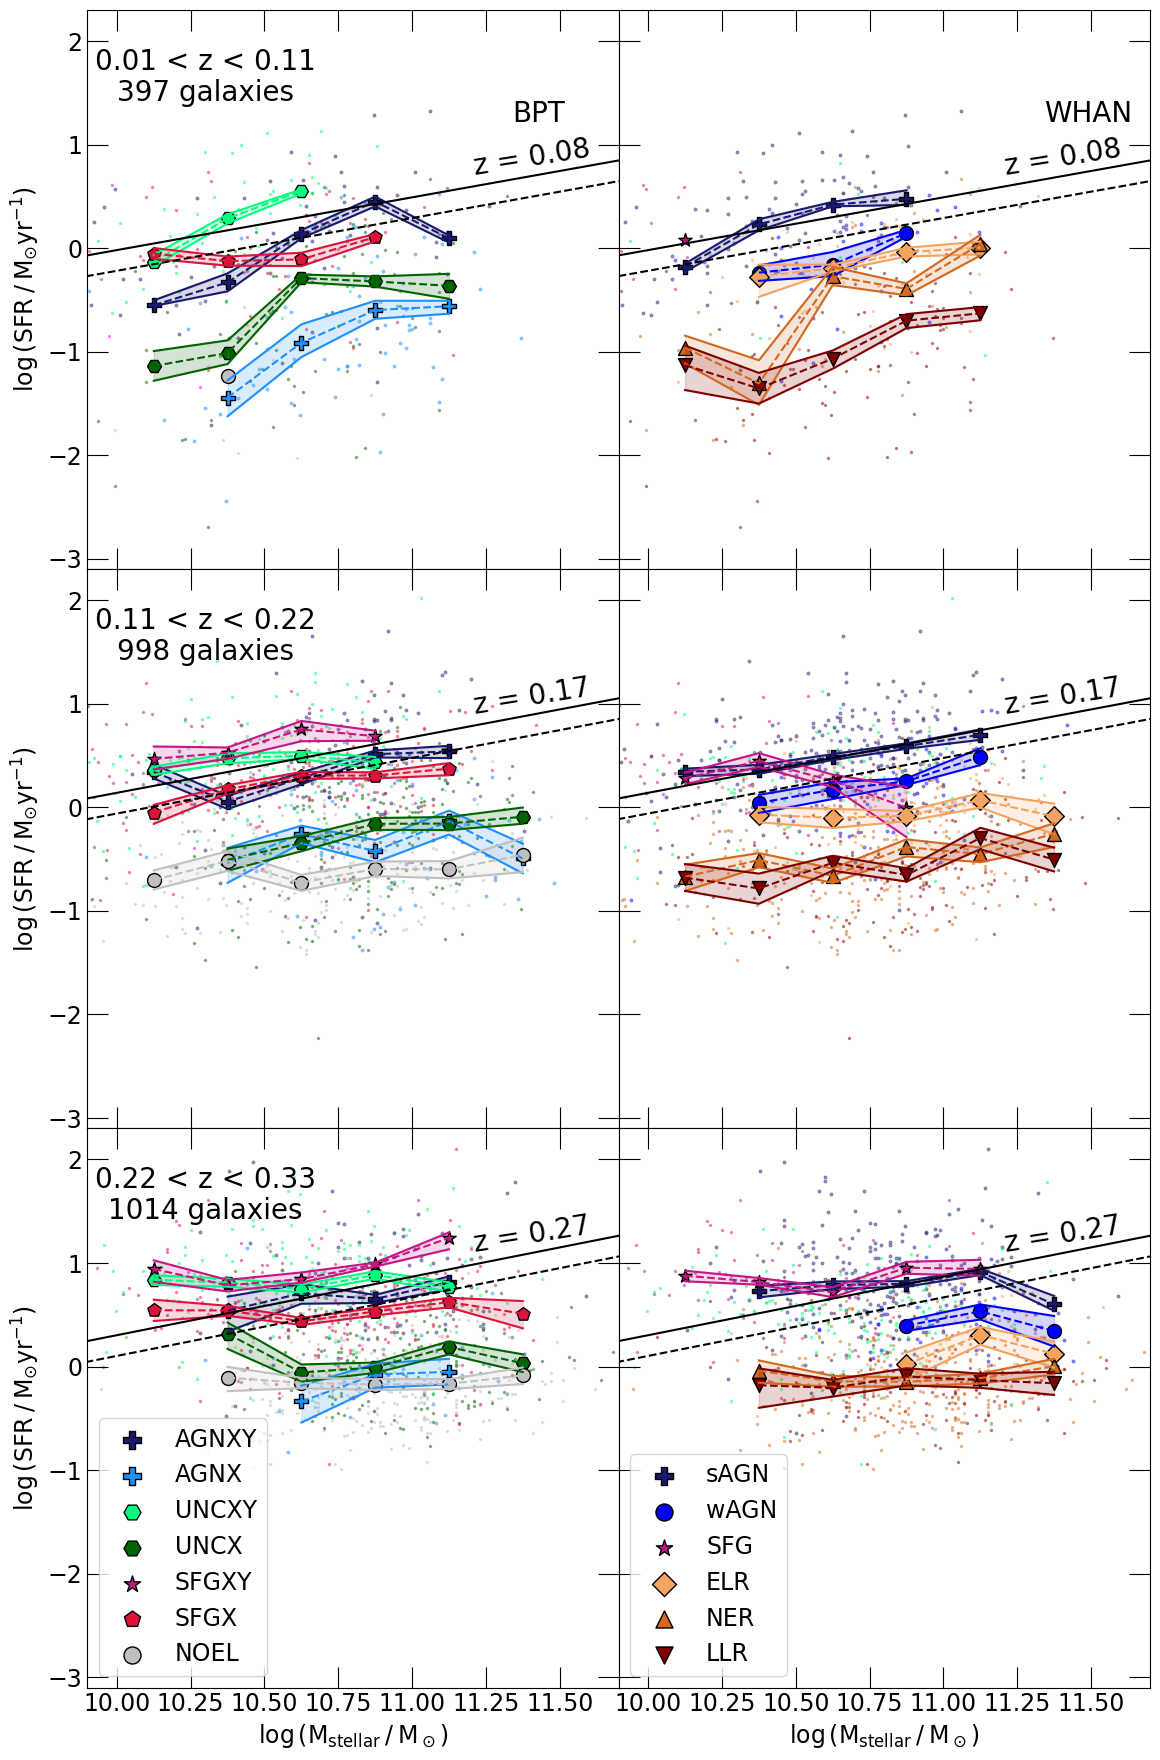

In [7]:
#applying some conditions for db
from astropy.cosmology import WMAP9 as cosmo

db = MainDataFrame

#setting up figure and its shape
gs_top = plt.GridSpec(3, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 18), tight_layout=True)
adjusting_plotting_pars()

ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1], sharey=ax1)
ax3 = fig.add_subplot(gs_top[1,0])
ax4 = fig.add_subplot(gs_top[1,1], sharey=ax3)
ax5 = fig.add_subplot(gs_top[2,0])
ax6 = fig.add_subplot(gs_top[2,1], sharey=ax5)

#creating basic plotting pars

db1 = db[db['Z'] <= 0.11]
db1 = db1[db1['Z'] > 0.01]
db1.reset_index(inplace=True, drop=True)
median1 = np.median(db1['Z'])
print(db1.shape)

pars_dict_1 ={
    'db' : db1,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.7],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.7, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : False,
    'ylabel' : r'$\log \mathrm{(SFR \: / \: M_{\odot} yr^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : True,
    'legend' : False
}

db2 = db[db['Z'] <= 0.22]
db2 = db2[db2['Z'] > 0.11]
db2.reset_index(inplace=True, drop=True)
median2 = np.median(db2['Z'])
print(db2.shape)

pars_dict_2 ={
    'db' : db2,
    'ax1' : ax3,
    'ax2' : ax4,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.7],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.7, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : False,
    'ylabel' : r'$\log \mathrm{(SFR \: / \: M_{\odot} yr^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : False,
    'legend' : False
}

db3 = db[db['Z'] <= 0.33]
db3 = db3[db3['Z'] > 0.22]
db3.reset_index(inplace=True, drop=True)
median3 = np.median(db3['Z'])
print(db3.shape)

pars_dict_3 ={
    'db' : db3,
    'ax1' : ax5,
    'ax2' : ax6,
    'x' : 'mass_stellar_percentile50',
    'y' : 'SFR_0_1Gyr_percentile50',
    'up' : 'SFR_0_1Gyr_percentile84',
    'down' : 'SFR_0_1Gyr_percentile16',
    'xlim' : [9.9, 11.7],
    'ylim' : [-3.1, 2.3],
    'xticks' : np.arange(10.0, 11.7, 0.25),
    'yticks' : np.arange(-3, 2.2, 1),
    'xlabel' : False,
    'ylabel' : r'$\log \mathrm{(SFR \: / \: M_{\odot} yr^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : False,
    'legend' : True
}

ax1, ax2 = plotting(pars_dict_1)
ax3, ax4 = plotting(pars_dict_2)
ax5, ax6 = plotting(pars_dict_3)

x = np.arange(6.9, 12, 0.1)
ax1.plot(x, (0.84 - 0.026*cosmo.age(median1).value)*x - (6.51 - 0.11*cosmo.age(median1).value), color='k', linestyle='solid')
ax1.plot(x, (0.84 - 0.026*cosmo.age(median1).value)*x - (6.51 - 0.11*cosmo.age(median1).value) - 0.2, color='k', linestyle='dashed')
ax1.text(11.2, (0.84 - 0.026*cosmo.age(median1).value)*11.4 - (6.5 - 0.11*cosmo.age(median1).value), f'z = {round(median1, 2)}', rotation=9)
ax1.text(10.3, 1.8, '0.01 < z < 0.11', ha='center', va='center')
ax1.text(10.3, 1.5, '397 galaxies', ha='center', va='center')
ax2.plot(x, (0.84 - 0.026*cosmo.age(median1).value)*x - (6.51 - 0.11*cosmo.age(median1).value), color='k', linestyle='solid')
ax2.plot(x, (0.84 - 0.026*cosmo.age(median1).value)*x - (6.51 - 0.11*cosmo.age(median1).value) - 0.2, color='k', linestyle='dashed')
ax2.text(11.2, (0.84 - 0.026*cosmo.age(median1).value)*11.4 - (6.5 - 0.11*cosmo.age(median1).value), f'z = {round(median1, 2)}', rotation=9)

ax3.plot(x, (0.84 - 0.026*cosmo.age(median2).value)*x - (6.51 - 0.11*cosmo.age(median2).value), color='k', linestyle='solid')
ax3.plot(x, (0.84 - 0.026*cosmo.age(median2).value)*x - (6.51 - 0.11*cosmo.age(median2).value) - 0.2, color='k', linestyle='dashed')
ax3.text(11.2, (0.84 - 0.026*cosmo.age(median2).value)*11.4 - (6.5 - 0.11*cosmo.age(median2).value), f'z = {round(median2, 2)}', rotation=9)
ax3.text(10.3, 1.8, '0.11 < z < 0.22', ha='center', va='center')
ax3.text(10.3, 1.5, '998 galaxies', ha='center', va='center')
ax4.plot(x, (0.84 - 0.026*cosmo.age(median2).value)*x - (6.51 - 0.11*cosmo.age(median2).value), color='k', linestyle='solid')
ax4.plot(x, (0.84 - 0.026*cosmo.age(median2).value)*x - (6.51 - 0.11*cosmo.age(median2).value) - 0.2, color='k', linestyle='dashed')
ax4.text(11.2, (0.84 - 0.026*cosmo.age(median2).value)*11.4 - (6.5 - 0.11*cosmo.age(median2).value), f'z = {round(median2, 2)}', rotation=9)

ax5.plot(x, (0.84 - 0.026*cosmo.age(median3).value)*x - (6.51 - 0.11*cosmo.age(median3).value), color='k', linestyle='solid')
ax5.plot(x, (0.84 - 0.026*cosmo.age(median3).value)*x - (6.51 - 0.11*cosmo.age(median3).value) - 0.2, color='k', linestyle='dashed')
ax5.text(11.2, (0.84 - 0.026*cosmo.age(median3).value)*11.4 - (6.5 - 0.11*cosmo.age(median3).value), f'z = {round(median3, 2)}', rotation=9)
ax5.text(10.3, 1.8, '0.22 < z < 0.33', ha='center', va='center')
ax5.text(10.3, 1.5, '1014 galaxies', ha='center', va='center')
ax6.plot(x, (0.84 - 0.026*cosmo.age(median3).value)*x - (6.51 - 0.11*cosmo.age(median3).value), color='k', linestyle='solid')
ax6.plot(x, (0.84 - 0.026*cosmo.age(median3).value)*x - (6.51 - 0.11*cosmo.age(median3).value) - 0.2, color='k', linestyle='dashed')
ax6.text(11.2, (0.84 - 0.026*cosmo.age(median3).value)*11.4 - (6.5 - 0.11*cosmo.age(median3).value), f'z = {round(median3, 2)}', rotation=9)


#additional plotting stuff
fig.savefig(r'E:\backup\backup_BPT\FIGURES_IN_PAPER_DR4\SFRSM.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)
#displaying and saving the figure 

AGN [0, 1, 9, 23, 56, 31, 5] 125
AGNX [0, 0, 4, 11, 29, 80, 25] 149
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [2, 8, 12, 20, 33, 18, 0] 93
UNCX [0, 0, 4, 40, 155, 197, 22] 418
UNCY [1, 1, 0, 0, 5, 0, 0] 7
SFGXY [0, 3, 1, 5, 9, 2, 0] 20
SFGX [0, 3, 13, 50, 127, 33, 7] 233
SFGY [0, 0, 0, 0, 5, 0, 0] 5
NOEL [2, 2, 8, 55, 200, 211, 11] 489
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [5, 18, 51, 204, 619, 572, 70] 1539


AGN [4, 14, 31, 47, 33, 7, 1] 137
AGNX [0, 1, 0, 2, 7, 1, 0] 11
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [19, 41, 80, 108, 40, 5, 0] 293
UNCX [0, 4, 3, 15, 27, 3, 0] 52
UNCY [0, 0, 3, 1, 0, 0, 0] 4
SFGXY [26, 31, 36, 33, 8, 3, 0] 137
SFGX [10, 9, 36, 93, 60, 3, 0] 211
SFGY [0, 0, 0, 0, 0, 0, 0] 0
NOEL [1, 2, 1, 14, 6, 1, 0] 25
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [60, 102, 190, 313, 181, 23, 1] 870


AGN [4, 15, 40, 70, 89, 38, 6] 262
AGNX [0, 1, 4, 13, 36, 81, 25] 160
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [21, 49, 92, 128, 73, 23, 0] 386
UNCX [0, 4, 7, 55, 182, 200, 22] 470
UNCY [1, 1, 3, 1, 5, 0, 0] 11
SFGXY [

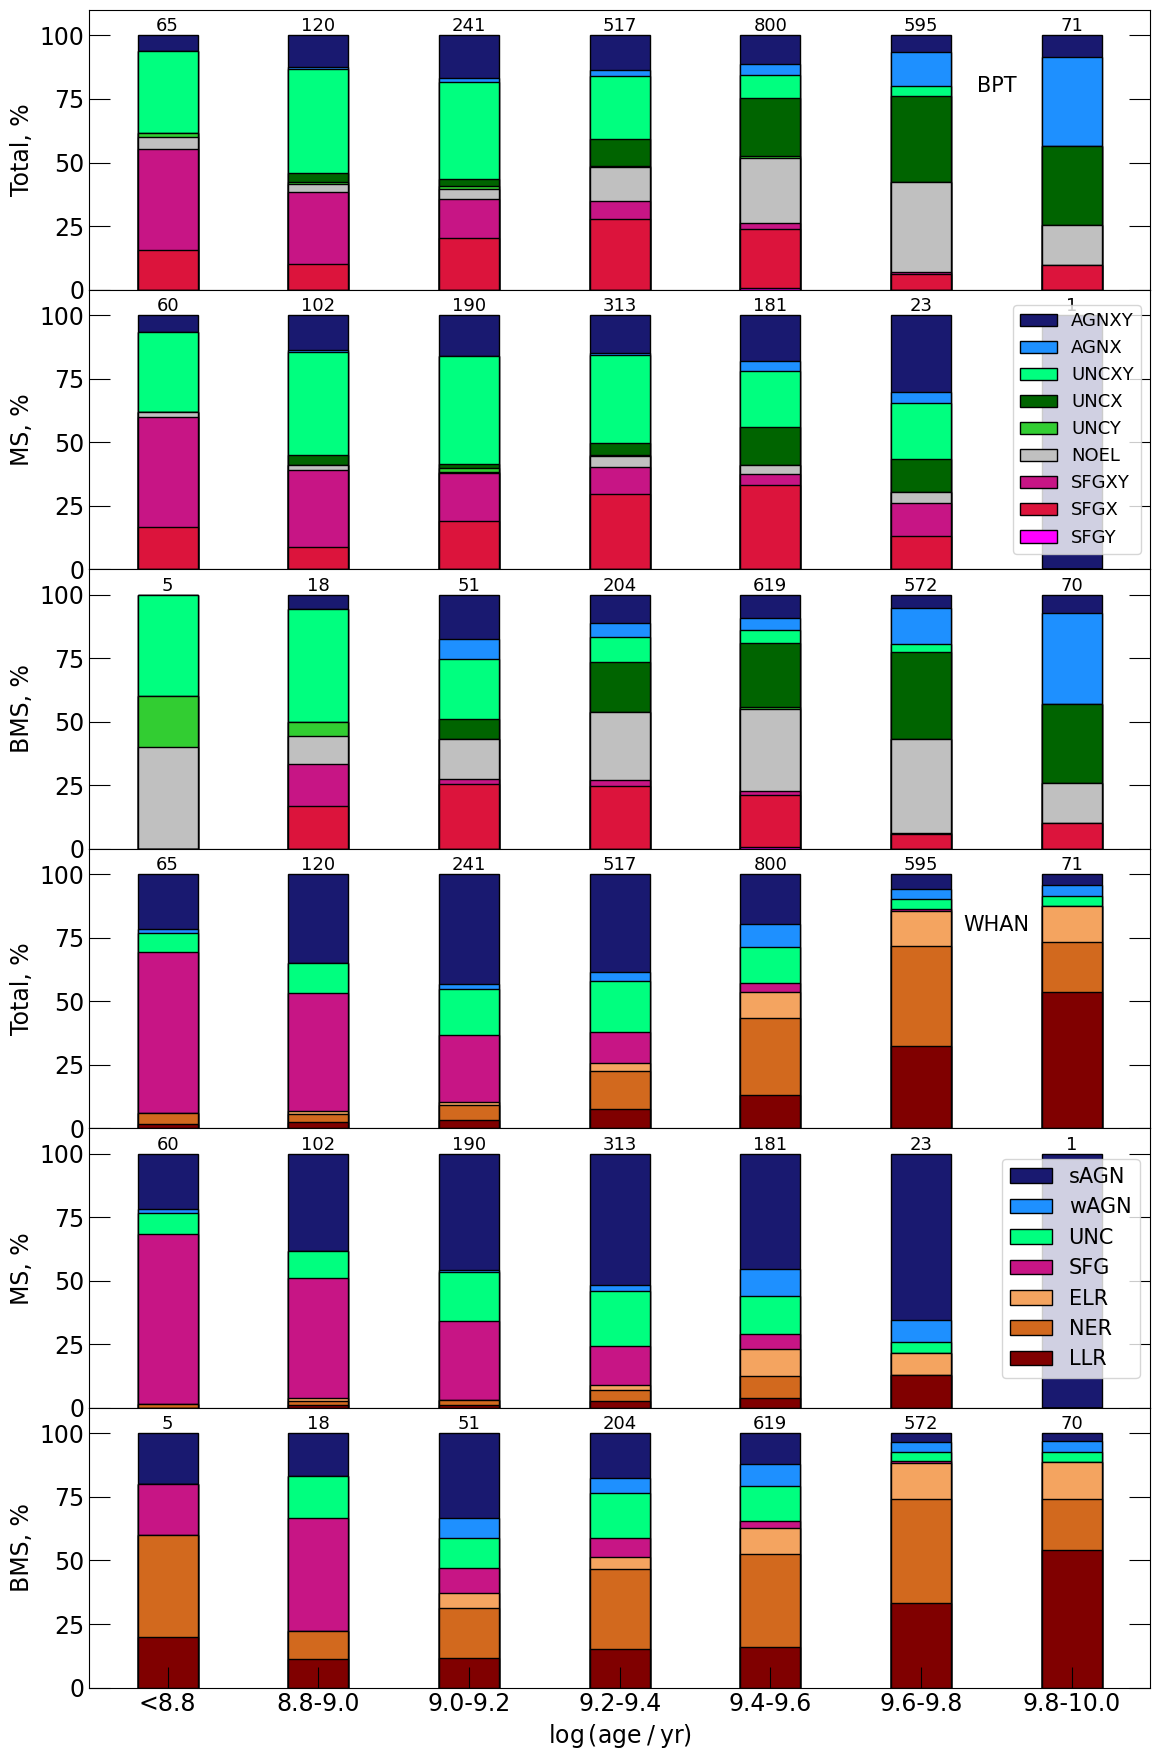

In [8]:
bin_stats({
    'input_path' : path,
    'x' : 'ager_percentile50',
    'xlabel' : r'$\log \mathrm{(age \: / \: yr)}$',
    'bins' : bids_age,
    'bins_names' : ['<8.8', '8.8-9.0', '9.0-9.2', '9.2-9.4', '9.4-9.6', '9.6-9.8', '9.8-10.0'],
    'save_path' : r'E:\backup\backup_BPT\FIGURES_IN_PAPER_DR4\AGE_SNAPSHOTS.pdf'
}
)

AGN [3, 7, 16, 34, 38, 23, 3] 124
AGNX [1, 3, 15, 30, 54, 34, 12] 149
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [12, 10, 14, 23, 23, 8, 3] 93
UNCX [10, 7, 30, 87, 144, 107, 28] 413
UNCY [2, 1, 0, 1, 3, 0, 0] 7
SFGXY [6, 2, 3, 4, 3, 2, 0] 20
SFGX [12, 7, 34, 55, 86, 32, 6] 232
SFGY [2, 0, 2, 0, 1, 0, 0] 5
NOEL [15, 23, 55, 123, 124, 108, 36] 484
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [63, 60, 169, 357, 476, 314, 88] 1527


AGN [7, 4, 15, 37, 50, 22, 2] 137
AGNX [0, 0, 2, 2, 6, 1, 0] 11
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [47, 39, 68, 86, 43, 10, 0] 293
UNCX [2, 3, 12, 14, 14, 6, 1] 52
UNCY [0, 2, 1, 1, 0, 0, 0] 4
SFGXY [66, 21, 18, 20, 8, 3, 1] 137
SFGX [25, 16, 42, 59, 47, 20, 2] 211
SFGY [0, 0, 0, 0, 0, 0, 0] 0
NOEL [5, 1, 3, 8, 6, 2, 0] 25
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [152, 86, 161, 227, 174, 64, 6] 870


AGN [10, 11, 31, 71, 88, 45, 5] 261
AGNX [1, 3, 17, 32, 60, 35, 12] 160
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [59, 49, 82, 109, 66, 18, 3] 386
UNCX [12, 10, 42, 101, 158, 113, 29] 465
UNCY [2, 3, 1, 2, 

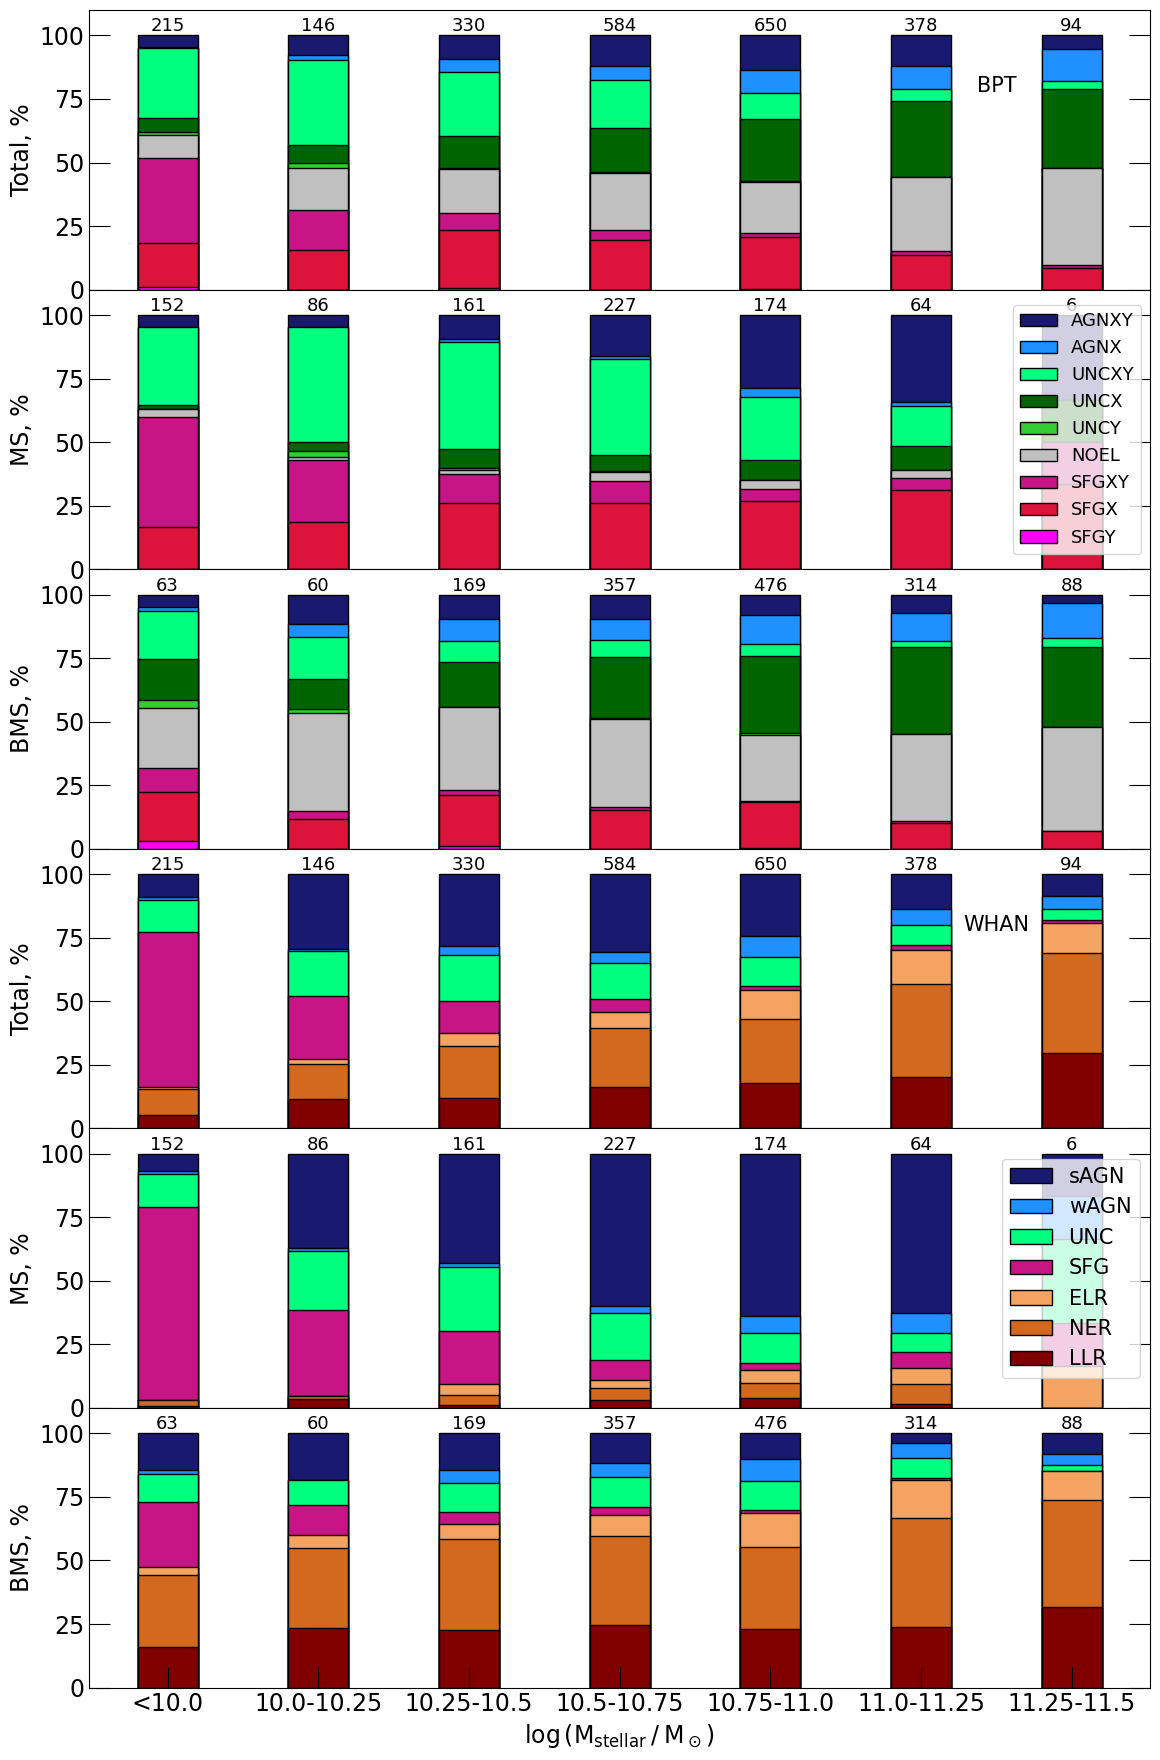

In [9]:
bin_stats({
    'input_path' : path,
    'x' : 'mass_stellar_percentile50',
    'xlabel' : r'$\log \mathrm{(M_{stellar} \: / \: M_\odot)}$',
    'bins' : bids_mass,
    'bins_names' : ['<10.0', '10.0-10.25', '10.25-10.5', '10.5-10.75', '10.75-11.0', '11.0-11.25', '11.25-11.5'],
    'save_path' : r'E:\backup\backup_BPT\FIGURES_IN_PAPER_DR4\MASS_SNAPSHOTS.pdf'
}
)

AGN [7, 18, 25, 26, 19, 21, 9] 125
AGNX [16, 36, 36, 28, 12, 14, 7] 149
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [4, 12, 18, 16, 13, 21, 9] 93
UNCX [10, 43, 81, 98, 65, 89, 32] 418
UNCY [0, 0, 1, 1, 1, 3, 1] 7
SFGXY [1, 3, 4, 5, 3, 3, 1] 20
SFGX [10, 13, 41, 53, 42, 61, 13] 233
SFGY [0, 0, 3, 1, 0, 0, 1] 5
NOEL [2, 9, 50, 88, 111, 174, 55] 489
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [50, 134, 259, 316, 266, 386, 128] 1539


AGN [2, 23, 25, 21, 25, 29, 12] 137
AGNX [1, 6, 3, 0, 1, 0, 0] 11
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [8, 33, 54, 52, 48, 71, 27] 293
UNCX [2, 10, 17, 6, 5, 10, 2] 52
UNCY [0, 0, 0, 0, 2, 1, 1] 4
SFGXY [11, 19, 22, 30, 19, 25, 11] 137
SFGX [3, 16, 42, 45, 34, 55, 16] 211
SFGY [0, 0, 0, 0, 0, 0, 0] 0
NOEL [0, 1, 5, 2, 1, 13, 3] 25
NDA [0, 0, 0, 0, 0, 0, 0] 0
TOT [27, 108, 168, 156, 135, 204, 72] 870


AGN [9, 41, 50, 47, 44, 50, 21] 262
AGNX [17, 42, 39, 28, 13, 14, 7] 160
AGNY [0, 0, 0, 0, 0, 0, 0] 0
UNC [12, 45, 72, 68, 61, 92, 36] 386
UNCX [12, 53, 98, 104, 70, 99, 34] 470
UNCY [0, 

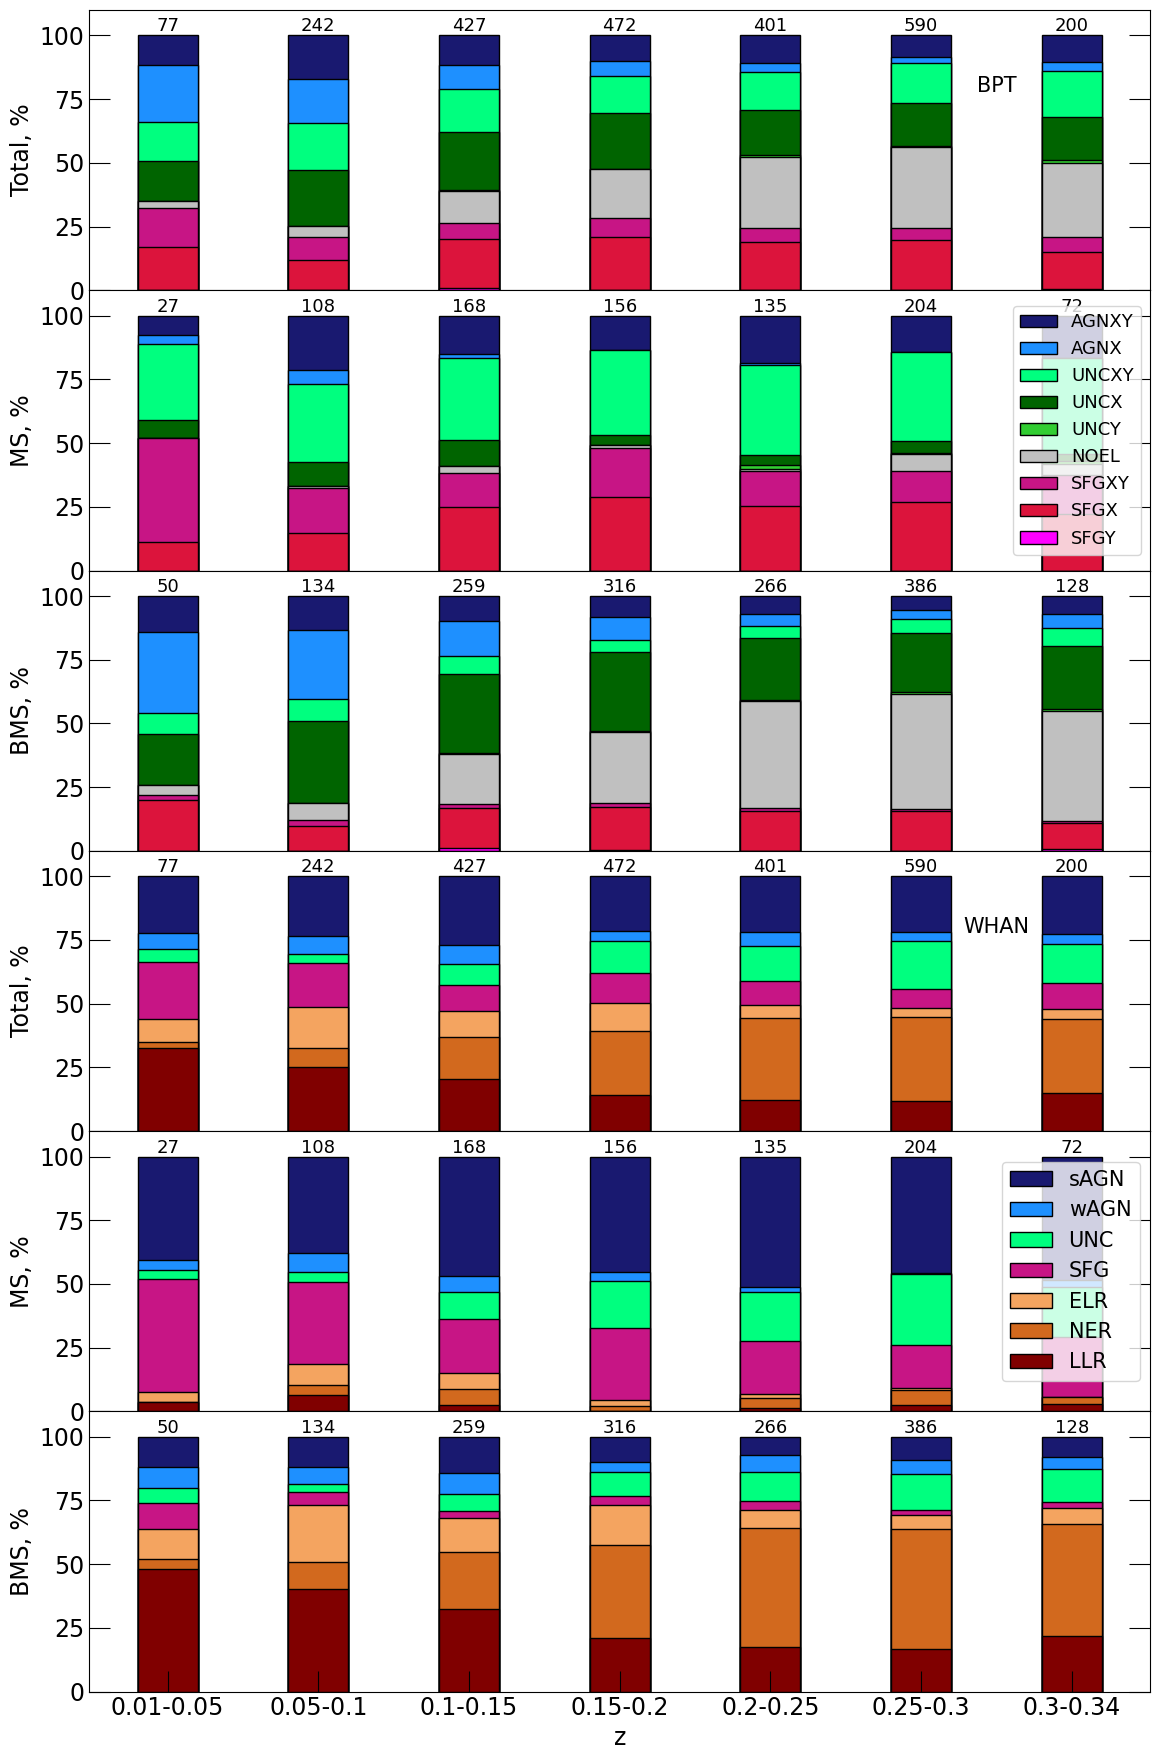

In [10]:
bin_stats({
    'input_path' : path,
    'x' : 'Z',
    'xlabel' : r'$\mathrm{z}$',
    'bins' : bids_z,
    'bins_names' : ['0.01-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25', '0.25-0.3', '0.3-0.34'],
    'save_path' : r'E:\backup\backup_BPT\FIGURES_IN_PAPER_DR4\RED_SNAPSHOTS.pdf'
}
)

e:\backup\backup_BPT\current\__plt__2.py:203: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axis.arrow(X_plot[i], Y_plot[i], 0, -0.3, head_width=0.01, head_length=0.1, width = 0.003, alpha = 1, color=item[4][0], edgecolor='black', facecolor='black')
C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_14292\1896594911.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(r'E:\backup\backup_BPT\FIGURES_IN_PAPER_DR4\OIII.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)
C:\Users\ALEZHA_ACTIVE\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\ALEZHA_ACTIVE\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure include

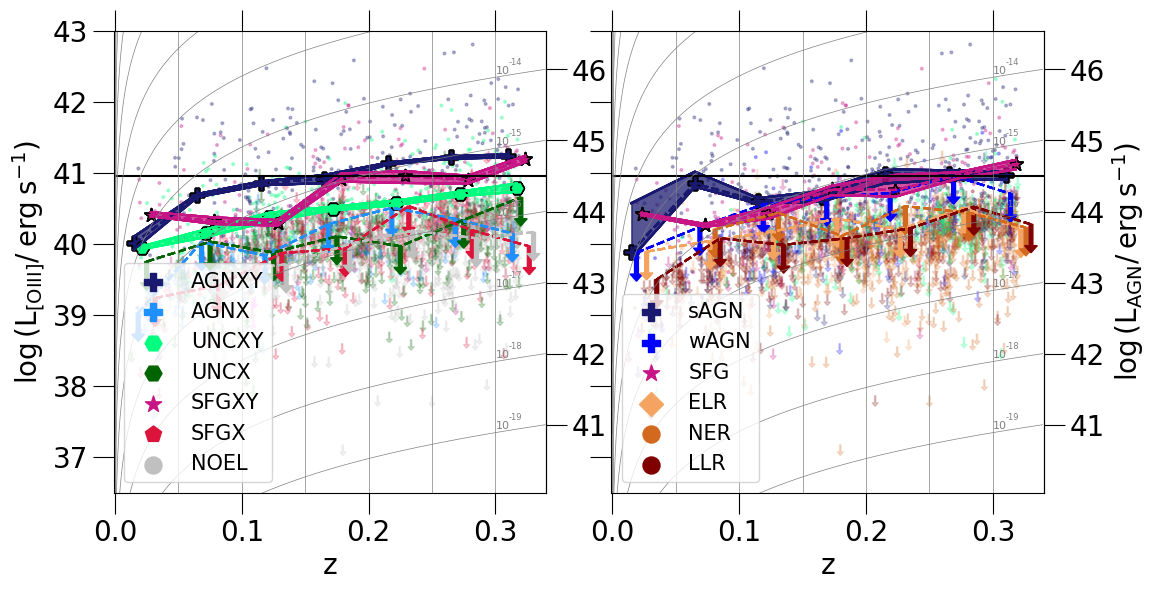

In [11]:
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM


def AGNtoOIII(x):
    return x - np.log10(3500)

def OIIItoAGN(x):
    return x + np.log10(3500)

def OIII_lum(flux, z):
    cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
    dist_Q = cosmo.luminosity_distance(z)
    distance = dist_Q.to(u.cm).value
    return np.log10(4 * np.pi * distance * distance * flux / ((1+z) * (10**(17))))

from outflows import *

gs_top = plt.GridSpec(1, 2, hspace=0.15, wspace=0.15)
fig = plt.figure(figsize=(12, 6), tight_layout=True)
adjusting_plotting_pars()
ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1])

db = MainDataFrame
db_up = db.query('LOIII_er < 0')
db_ok = db.query('LOIII_er > 0')

axes = [ax1, ax2]
secax1 = ax1.secondary_yaxis('right', functions=(OIIItoAGN, AGNtoOIII))
secax2 = ax2.secondary_yaxis('right', functions=(OIIItoAGN, AGNtoOIII))
secax2.set_ylabel(r'$\log \mathrm{(L_{AGN} / \: erg \: s^{-1})}$')

ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, left=True, direction='out', labelsize=20)
ax2.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, left=True, labelleft=False, direction='out', labelsize=20)

ax1.scatter(db_ok['Z'], db_ok['LOIII'], color=[color_dict_BPT[item][0] for item in db_ok['BPT']], s=15, alpha = 0.3, marker='.')
dp_up = db_up.reset_index(inplace=True, drop=True)
for i in range(len(db_up['Z'])):
    ax1.arrow(db_up['Z'][i], db_up['LOIII'][i], 0, -0.1, head_width=0.005, head_length=0.05, color=color_dict_BPT[db_up['BPT'][i]][0], alpha = 0.2)
    
ax2.scatter(db_ok['Z'], db_ok['LOIII'], color=[cd_WHAN[item][0] for item in db_ok['WHAN']], s=15, alpha=0.3, marker='.')
dp_up = db_up.reset_index(inplace=True, drop=True)
for i in range(len(db_up['Z'])):
    ax2.arrow(db_up['Z'][i], db_up['LOIII'][i], 0, -0.1, head_width=0.005, head_length=0.05, color=cd_WHAN[db_up['WHAN'][i]][0], alpha = 0.2)

LOIII_up = [0 if db['LOIII_er'][i] < 0 else np.log10((10**db['LOIII'][i]) + (10**db['LOIII_er'][i])) for i, item in enumerate(db['LOIII'])]
LOIII_down = [0 if db['LOIII_er'][i] < 0 else np.log10((10**db['LOIII'][i]) - (10**db['LOIII_er'][i])) for i, item in enumerate(db['LOIII'])]
ks = [0 if db['LOIII_er'][i] < 0 else 1 for i, item in enumerate(db['LOIII'])]

class_list_BPT = class_list_creator_w_err_out(db['Z'], db['LOIII'], LOIII_up, LOIII_down, db['BPT'], 'BPT', ks)
class_list_WHAN = class_list_creator_w_err_out(db['Z'], db['LOIII'], LOIII_up, LOIII_down, db['WHAN'], 'WHAN', ks)

classlist_plotter_uplim(axes[0], class_list_BPT, bids_z)
classlist_plotter_uplim(axes[1], class_list_WHAN, bids_z)

for ax in axes:
    ax.axhline(44.5 - np.log10(3500), color='black')
    z = np.arange(0.0001, 0.34, 0.001)
    a = np.arange(-2, 10, 1)
    b = np.arange(0, 0.35, 0.05)
    for item in a:
        ax.plot(z, OIII_lum(1, z) + item, color='grey', linewidth=0.5)
        if OIII_lum(1, 0.3) + item + 0.05 < 43:
            texts = -17 + item
            ax.text(0.3, OIII_lum(1, 0.3) + item + 0.05, '10', color='grey', fontsize=8)
            ax.text(0.31, OIII_lum(1, 0.31) + item + 0.15, f'{texts}', color='grey', fontsize=6)
    for item in b:
        ax.axvline(item, color='grey', linewidth=0.5)
    ax.set_xlabel(r'$\mathrm{z}$')
    ax.set_ylim(36.5, 43)
    ax.set_xlim(-0.001, 0.34)
    
    
ax1.set_ylabel(r'$\log \mathrm{(L_{[OIII]} / \: erg \: s^{-1})}$')

for j, item in enumerate(class_list_BPT):
    axes[0].scatter(-99, -99, alpha = 1, color=item[4][0], marker=item[4][1], s = 150, label=list_names_BPT_1[j])
axes[0].legend(loc=3, fontsize=15)

for j, item in enumerate(class_list_WHAN):
    axes[1].scatter(-99, -99, alpha = 1, color=item[4][0], marker=item[4][1], s = 150, label=list_names_WHAN[j])
axes[1].legend(loc=3, fontsize=15)

fig.savefig(r'E:\backup\backup_BPT\FIGURES_IN_PAPER_DR4\OIII.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)

In [14]:
db = MainDataFrame
db_ok = db.query('LOIII_er > 0 & LOIII > 41')
print(db_ok.shape)

db_ok_AGN = db_ok.query("WHAN == 'wAGN' | WHAN == 'sAGN'")
print(db_ok_AGN.shape)

(232, 22)
(164, 22)


[39.10117521596577, 40.30700022679374, 41.032771235747546, 41.7208133697061, 42.80606235025739]
[42.64524326031604, 43.851068271144015, 44.57683928009782, 45.264881414056376, 46.35013039460767]


C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_14292\3750071115.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig(r'E:\backup\backup_BPT\FIGURES_IN_PAPER_DR4\OIII.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)
C:\Users\ALEZHA_ACTIVE\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\ALEZHA_ACTIVE\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


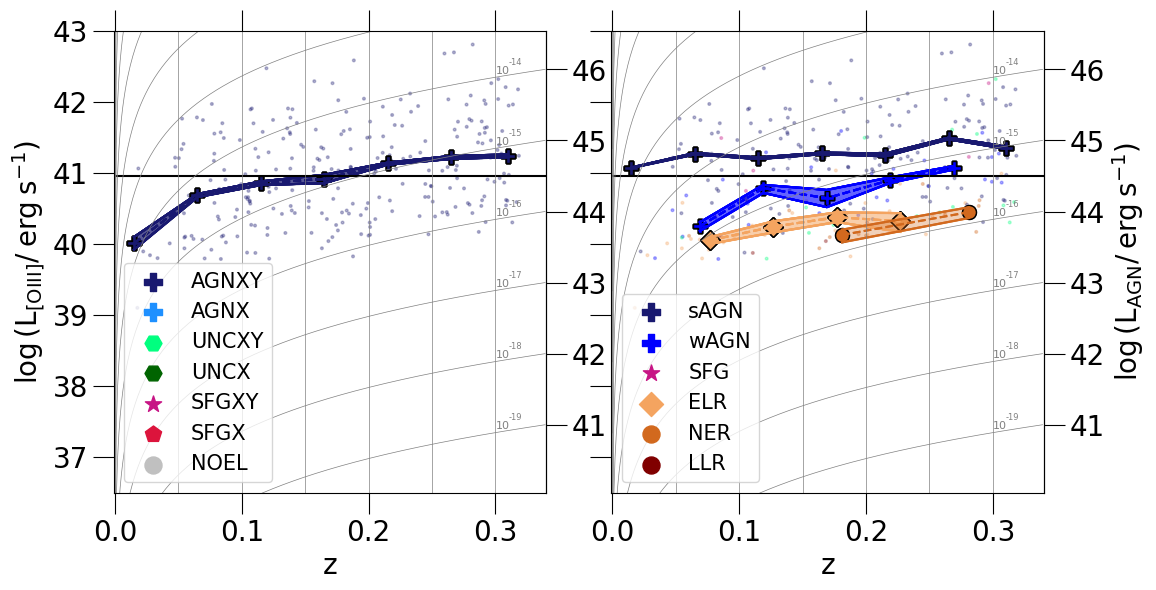

In [15]:
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM


def AGNtoOIII(x):
    return x - np.log10(3500)

def OIIItoAGN(x):
    return x + np.log10(3500)

def OIII_lum(flux, z):
    cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
    dist_Q = cosmo.luminosity_distance(z)
    distance = dist_Q.to(u.cm).value
    return np.log10(4 * np.pi * distance * distance * flux / ((1+z) * (10**(17))))

from outflows import *

gs_top = plt.GridSpec(1, 2, hspace=0.15, wspace=0.15)
fig = plt.figure(figsize=(12, 6), tight_layout=True)
adjusting_plotting_pars()
ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1])

db_init = MainDataFrame
db = db_init.query('LOIII_er > 0 & (BPT == "AGNXY")')
# db = db_init.query('LOIII_er > 0')
# db = db.reset_index(inplace=True, drop=True)
db_up = db.query('LOIII_er < 0')
db_ok = db.query('LOIII_er > 0')

dp = db.reset_index(inplace=True, drop=True)

values_OIII = [np.min(db['LOIII']), np.percentile(db['LOIII'], 16), np.percentile(db['LOIII'], 50), np.percentile(db['LOIII'], 84), np.max(db['LOIII'])]
values_AGN = [item + np.log10(3500) for item in values_OIII]

print(values_OIII)
print(values_AGN)

axes = [ax1, ax2]
secax1 = ax1.secondary_yaxis('right', functions=(OIIItoAGN, AGNtoOIII))
secax2 = ax2.secondary_yaxis('right', functions=(OIIItoAGN, AGNtoOIII))
secax2.set_ylabel(r'$\log \mathrm{(L_{AGN} / \: erg \: s^{-1})}$')

ax1.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, left=True, direction='out', labelsize=20)
ax2.tick_params(top=True, labeltop=False, bottom=True, labelbottom=True, left=True, labelleft=False, direction='out', labelsize=20)

ax1.scatter(db_ok['Z'], db_ok['LOIII'], color=[color_dict_BPT[item][0] for item in db_ok['BPT']], s=15, alpha = 0.3, marker='.')
dp_up = db_up.reset_index(inplace=True, drop=True)
for i in range(len(db_up['Z'])):
    ax1.arrow(db_up['Z'][i], db_up['LOIII'][i], 0, -0.1, head_width=0.005, head_length=0.05, color=color_dict_BPT[db_up['BPT'][i]][0], alpha = 0.2)
    
ax2.scatter(db_ok['Z'], db_ok['LOIII'], color=[cd_WHAN[item][0] for item in db_ok['WHAN']], s=15, alpha=0.3, marker='.')
dp_up = db_up.reset_index(inplace=True, drop=True)
for i in range(len(db_up['Z'])):
    ax2.arrow(db_up['Z'][i], db_up['LOIII'][i], 0, -0.1, head_width=0.005, head_length=0.05, color=cd_WHAN[db_up['WHAN'][i]][0], alpha = 0.2)

LOIII_up = [0 if db['LOIII_er'][i] < 0 else np.log10((10**db['LOIII'][i]) + (10**db['LOIII_er'][i])) for i, item in enumerate(db['LOIII'])]
LOIII_down = [0 if db['LOIII_er'][i] < 0 else np.log10((10**db['LOIII'][i]) - (10**db['LOIII_er'][i])) for i, item in enumerate(db['LOIII'])]
ks = [0 if db['LOIII_er'][i] < 0 else 1 for i, item in enumerate(db['LOIII'])]

class_list_BPT = class_list_creator_w_err_out(db['Z'], db['LOIII'], LOIII_up, LOIII_down, db['BPT'], 'BPT', ks)
class_list_WHAN = class_list_creator_w_err_out(db['Z'], db['LOIII'], LOIII_up, LOIII_down, db['WHAN'], 'WHAN', ks)

classlist_plotter_uplim(axes[0], class_list_BPT, bids_z)
classlist_plotter_uplim(axes[1], class_list_WHAN, bids_z)

for ax in axes:
    ax.axhline(44.5 - np.log10(3500), color='black')
    z = np.arange(0.0001, 0.34, 0.001)
    a = np.arange(-2, 10, 1)
    b = np.arange(0, 0.35, 0.05)
    for item in a:
        ax.plot(z, OIII_lum(1, z) + item, color='grey', linewidth=0.5)
        if OIII_lum(1, 0.3) + item + 0.05 < 43:
            texts = -17 + item
            ax.text(0.3, OIII_lum(1, 0.3) + item + 0.05, '10', color='grey', fontsize=8)
            ax.text(0.31, OIII_lum(1, 0.31) + item + 0.15, f'{texts}', color='grey', fontsize=6)
    for item in b:
        ax.axvline(item, color='grey', linewidth=0.5)
    ax.set_xlabel(r'$\mathrm{z}$')
    ax.set_ylim(36.5, 43)
    ax.set_xlim(-0.001, 0.34)
    
    
ax1.set_ylabel(r'$\log \mathrm{(L_{[OIII]} / \: erg \: s^{-1})}$')

for j, item in enumerate(class_list_BPT):
    axes[0].scatter(-99, -99, alpha = 1, color=item[4][0], marker=item[4][1], s = 150, label=list_names_BPT_1[j])
axes[0].legend(loc=3, fontsize=15)

for j, item in enumerate(class_list_WHAN):
    axes[1].scatter(-99, -99, alpha = 1, color=item[4][0], marker=item[4][1], s = 150, label=list_names_WHAN[j])
axes[1].legend(loc=3, fontsize=15)

fig.savefig(r'E:\backup\backup_BPT\FIGURES_IN_PAPER_DR4\OIII.pdf', dpi=300, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)